In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.__version__

'2.0.0'

In [71]:

#데이터셋 로딩
(x_train, y_train),(x_test, y_test)  = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 24s 0us/step


In [78]:
x_train.shape

(50000, 32, 32, 3)

In [98]:
#shape를 찍어보면 불필요한 차원이 있음(맨뒤 1차원)
y_train.shape

(50000, 1)

In [99]:
#불필요한 차원 삭제
y_train= np.squeeze(y_train)
y_test= np.squeeze(y_test)
y_train.shape

(50000,)

In [101]:
y_train[0]

6

In [102]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 
          'frog', 'horse', 'ship', 'truck']

In [74]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [75]:
#데이터 정규화
x_train = x_train/255.0
x_test = x_test/255.0

In [103]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

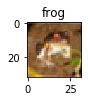

In [110]:
# 0번데이터 출력
plt.figure(figsize=(1,1))
plt.imshow(x_train[0])
plt.title(labels[y_train[0]])
plt.show()

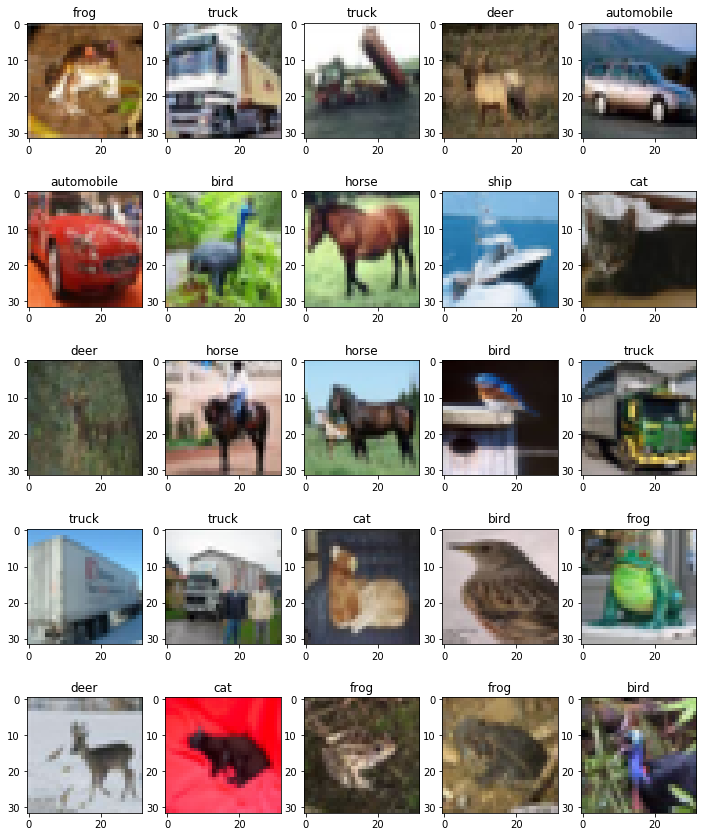

In [113]:
plt.figure(figsize=(12,15))
for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
    plt.title(labels[y_train[i]])
plt.show()

In [114]:
#ANN 모델 만들기 
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32,3)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 32)                98336     
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                330       
Total params: 98,666
Trainable params: 98,666
Non-trainable params: 0
_________________________________________________________________


In [115]:
#옵티마이저, 손실함수, 척도 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [116]:
# validation data설정후 모델학습
hist=model.fit(x_train[:10000], y_train[:10000], validation_split=0.2, epochs= 30)

Train on 8000 samples, validate on 2000 samples
Epoch 1/30
8000/8000 [==============================] - 1s 112us/sample - loss: 2.2364 - accuracy: 0.1495 - val_loss: 2.1563 - val_accuracy: 0.1870
Epoch 2/30
8000/8000 [==============================] - 1s 78us/sample - loss: 2.1366 - accuracy: 0.1867 - val_loss: 2.0961 - val_accuracy: 0.2260
Epoch 3/30
8000/8000 [==============================] - 1s 75us/sample - loss: 2.1124 - accuracy: 0.1969 - val_loss: 2.1905 - val_accuracy: 0.1905
Epoch 4/30
8000/8000 [==============================] - 1s 75us/sample - loss: 2.1030 - accuracy: 0.1990 - val_loss: 2.0361 - val_accuracy: 0.2325
Epoch 5/30
8000/8000 [==============================] - 1s 76us/sample - loss: 2.0994 - accuracy: 0.1971 - val_loss: 2.0386 - val_accuracy: 0.2350
Epoch 6/30
8000/8000 [==============================] - 1s 76us/sample - loss: 2.0963 - accuracy: 0.1981 - val_loss: 2.0971 - val_accuracy: 0.1940
Epoch 7/30
8000/8000 [==============================] - 1s 78us/sampl

In [117]:
#정확도 확인
print(hist.history['accuracy'])
print(hist.history['val_accuracy'])

[0.1495, 0.18675, 0.196875, 0.199, 0.197125, 0.198125, 0.20675, 0.205, 0.21275, 0.2115, 0.2165, 0.20825, 0.21625, 0.211375, 0.215875, 0.21225, 0.215375, 0.21375, 0.21175, 0.214375, 0.216, 0.216625, 0.22, 0.2225, 0.22, 0.218, 0.222625, 0.222125, 0.2195, 0.217]
[0.187, 0.226, 0.1905, 0.2325, 0.235, 0.194, 0.224, 0.225, 0.2395, 0.24, 0.236, 0.243, 0.227, 0.242, 0.24, 0.238, 0.235, 0.224, 0.219, 0.231, 0.24, 0.2435, 0.2435, 0.2375, 0.2145, 0.23, 0.2355, 0.2385, 0.222, 0.2505]


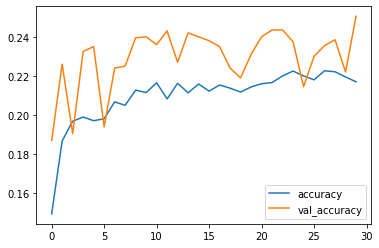

In [118]:
#정확도 그래프 그리기
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [119]:
#언더피팅이 남을 알 수 있다. 히든 레이어 증가시켜야
model.evaluate(x_test,y_test,verbose=2)

10000/1 - 1s - loss: 1.9991 - accuracy: 0.2410


[1.9988480474472046, 0.241]

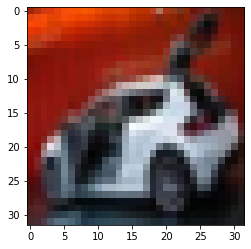

(1, 32, 32, 3)
[[ 1  4 14 14 16 14 17 12  0  2]]
frog
y_test: automobile


In [122]:
# 결과분석
test_num = 6
plt.imshow(x_test[test_num])
plt.show()

test_img = np.expand_dims(x_test[test_num], axis=0)
print(test_img.shape)
result = model.predict(test_img)
print((result*100).astype(int))
print(labels[np.argmax(result)])
print("y_test:",labels[y_test[test_num]])

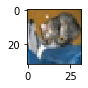

[[ 4  4 14 13 14 13 14 13  2  4]]
deer
y_test: cat


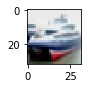

[[ 4 32  0  0  0  0  0  0 17 43]]
truck
y_test: ship


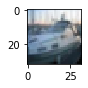

[[15 17  2  5  1  2  1  3 25 24]]
ship
y_test: ship


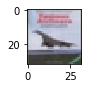

[[17  5 10  9  8  9  6 11 14  7]]
airplane
y_test: airplane


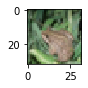

[[ 2  4 14 14 15 14 16 12  1  3]]
frog
y_test: frog


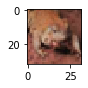

[[ 0  4 13 16 15 14 22 10  0  1]]
frog
y_test: frog


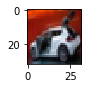

[[ 1  4 14 14 16 14 17 12  0  2]]
frog
y_test: automobile


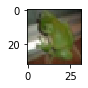

[[ 1  4 14 14 16 14 18 12  0  2]]
frog
y_test: frog


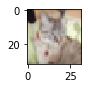

[[ 2  4 14 14 15 14 16 12  1  3]]
frog
y_test: cat


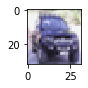

[[ 7 28  0  1  0  0  0  0 21 38]]
truck
y_test: automobile


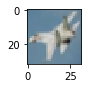

[[18  9  6  8  4  6  3  8 20 13]]
ship
y_test: airplane


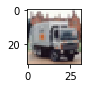

[[ 3 34  0  1  0  0  0  0 16 43]]
truck
y_test: truck


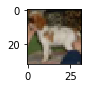

[[ 3  4 14 14 15 14 15 13  1  3]]
frog
y_test: dog


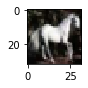

[[18  9  6  8  4  6  3  8 20 12]]
ship
y_test: horse


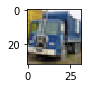

[[17 14  3  6  1  3  1  5 24 20]]
ship
y_test: truck


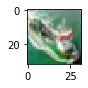

[[14  5 11 10  9 10  7 12 10  6]]
airplane
y_test: ship


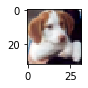

[[ 7  5 13 12 12 12 11 13  4  5]]
horse
y_test: dog


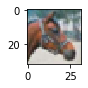

[[ 8  5 13 12 12 12 11 13  5  5]]
horse
y_test: horse


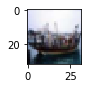

[[ 9 25  0  2  0  0  0  1 24 34]]
truck
y_test: ship


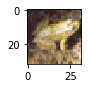

[[ 0  3 14 14 17 14 21 11  0  1]]
frog
y_test: frog


In [123]:
# 결과분석
for i in range(20):
    test_num = i
    plt.figure(figsize=(1,1))
    plt.imshow(x_test[test_num])
    plt.show()

    test_img = np.expand_dims(x_test[test_num], axis=0)
    result = model.predict(test_img)
    print((result*100).astype(int))
    print(labels[np.argmax(result)])
    print("y_test:",labels[y_test[test_num]])